In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)


In [3]:
df = pd.read_csv('MBA.csv')

df['admission'] = df['admission'].fillna(-1)
df['admission'] = df['admission'].replace("Admit",1)
df['admission'] = df['admission'].replace("Waitlist",0)

y = df.admission.values
df = pd.get_dummies(df, columns=['gender', 'work_industry', 'major', 'race'], drop_first=False)

df.head()

X=df.drop(['admission'], axis='columns').values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size =0.30, random_state=42)

/var/folders/d2/dbplq90x2ll9l3bnlgkbjtlr0000gn/T/ipykernel_95252/2213882409.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace("Waitlist",0)



Predictions classification counts:
Deny        1699
Admit        148
Waitlist      12
Name: count, dtype: int64

Actual classification counts:
Deny        1525
Admit        299
Waitlist      35
Name: count, dtype: int64
Confusion Matrix:
[[1434    6   85]
 [  30    0    5]
 [ 235    6   58]]


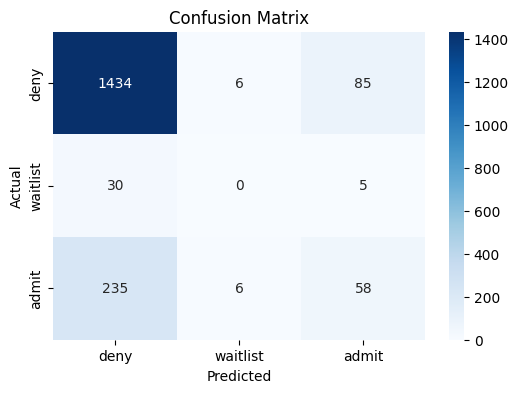

Classification Report:
              precision    recall  f1-score   support

       Admit       0.84      0.94      0.89      1525
    Waitlist       0.00      0.00      0.00        35
        Deny       0.39      0.19      0.26       299

    accuracy                           0.80      1859
   macro avg       0.41      0.38      0.38      1859
weighted avg       0.76      0.80      0.77      1859



In [4]:
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, ytrain)
y_pred = knn.predict(Xtest)


k = 3  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, ytrain)

# Make predictions
y_pred = knn.predict(Xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

admission_mapping = {
    1: "Admit",
    0: "Waitlist",
    -1: "Deny"
}

predicted_admission = pd.Series(y_pred).map(admission_mapping)
prediction_counts = predicted_admission.value_counts()
admission = pd.Series(ytest).map(admission_mapping)
counts = admission.value_counts()
print("\nPredictions classification counts:")
print(prediction_counts)

print("\nActual classification counts:")
print(counts)

cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['deny', 'waitlist', 'admit'], yticklabels=['deny', 'waitlist', 'admit'])
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(ytest, y_pred, target_names=["Admit", "Waitlist", "Deny"])
print("Classification Report:")
print(report)